# mRNA transfection

Thu Si Nguyen Mai | s4278836

In [1]:
library(deSolve)

library(tidyr)
library(ggplot2)
library(gridExtra)
library(repr)

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

## Simulating the system

In [2]:
mrnaODE <- function(time, state, params){
    with(
        as.list(c(state, params)),
        {
            dm <- -delta*m
            dg <- k*m - beta*g
            return(list(c(dm, dg)))
        }
    )
}

pars <- c(beta = 0.01, delta = 0.1, k = 10)
init <- c(m = 100, g = 0)
t <- seq(0, 200, 1)

solution <- ode(y = init, times = t, func = mrnaODE, parms = pars)
solution_df <- as.data.frame(solution)
head(solution_df)

,time,m,g
,<dbl>,<dbl>,<dbl>
1,0,100.00000,0.0000
2,1,90.48374,946.8046
3,2,81.87307,1794.0882
4,3,74.08182,2551.4150
5,4,67.03200,3227.4386
6,5,60.65307,3829.9861


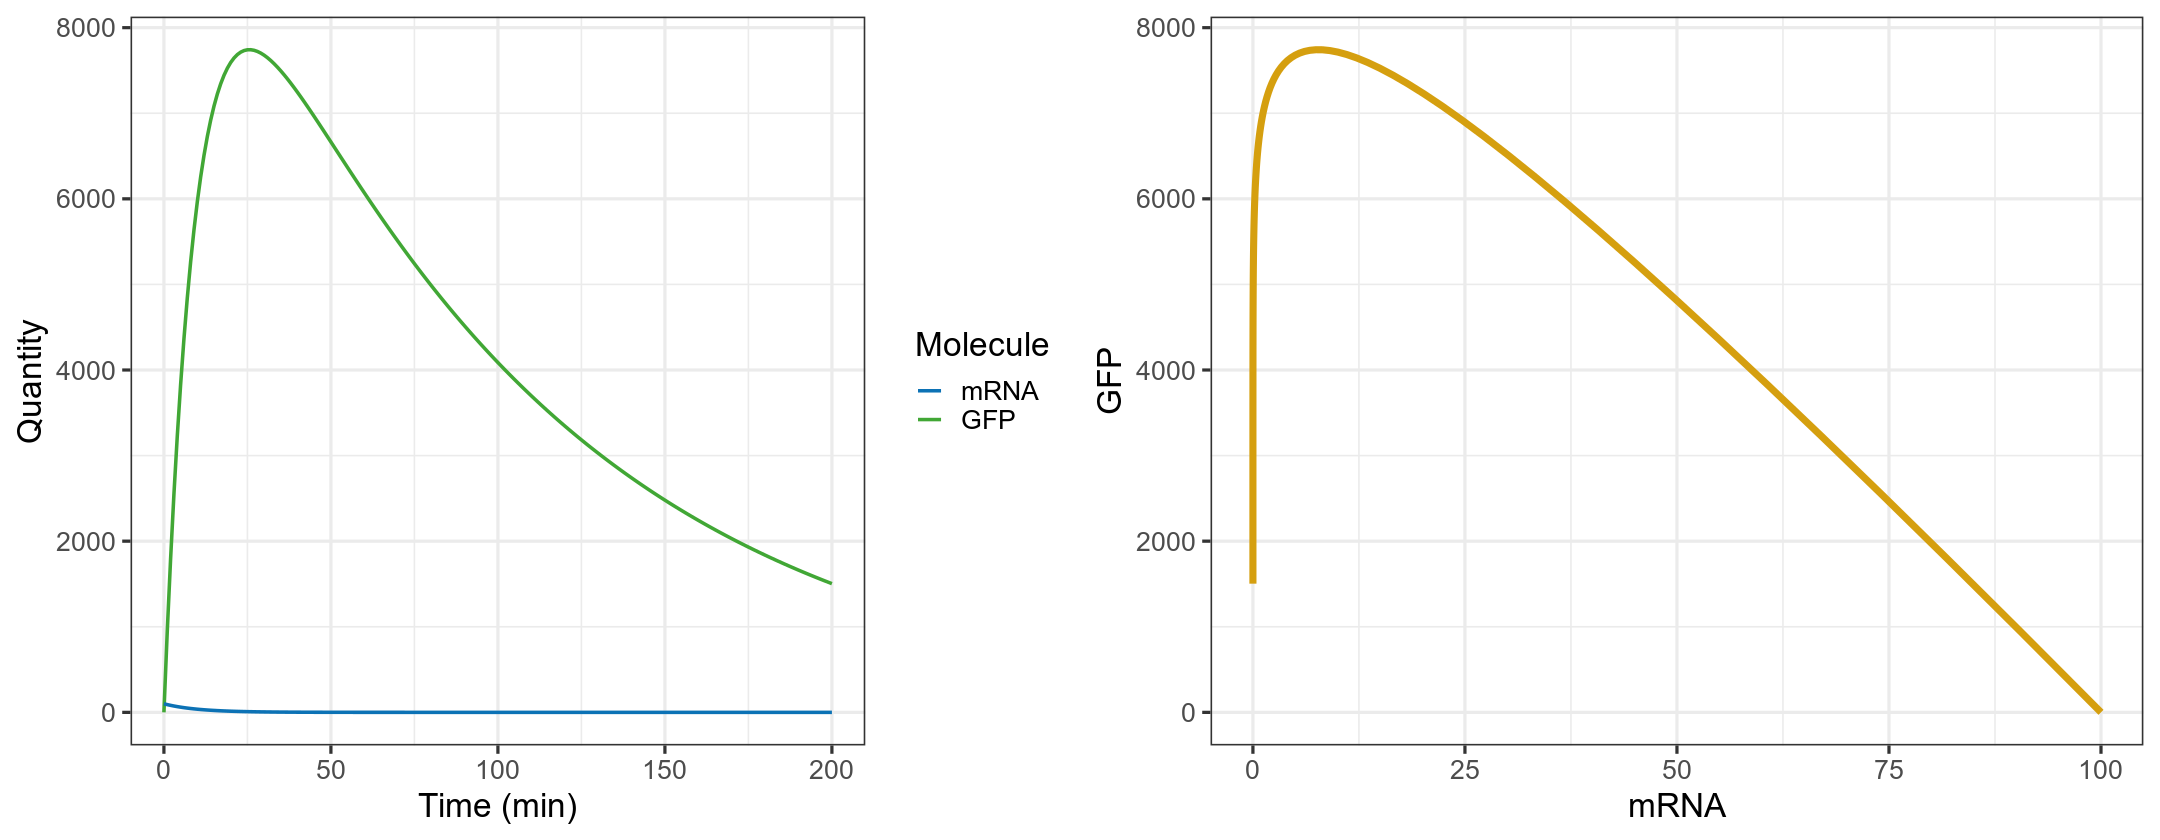

In [16]:
solution_df_long <- gather(solution_df, key = "molecule", value = "amount", m, g)

timePlot <- ggplot(data = solution_df_long, mapping = aes(x = time, y = amount, color = molecule)) + 
            geom_line(size = 1) +
            labs(x = "Time (min)", y = "Quantity", colour = "Molecule") +
            scale_colour_manual(values = c("m" = "#0c72b5", "g" = "#41a735"), labels = c("mRNA", "GFP")) +
            theme_bw(base_size=20)

phasePlot <- ggplot(data = solution_df, mapping = aes(x = m, y = g)) + 
            geom_path(colour = "#d59f0f", size=2) +
            labs(x = "mRNA", y = "GFP") +
            theme_bw(base_size=20)

fig(18, 7)
grid.arrange(timePlot, phasePlot, ncol = 2, nrow = 1)